<a href="https://colab.research.google.com/github/sujal-prakash15/Machine_learning/blob/master/k_nearest_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv('/content/drive/MyDrive/KNN/Social_Network_Ads.csv')
print(df)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


In [5]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [6]:
print(x)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [7]:
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


## Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=1)

## Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [10]:
print(X_train)

[[-0.80330081 -1.19121795]
 [ 0.75697997 -1.36859801]
 [ 0.85449752  1.43991958]
 [-0.51074816 -1.48685138]
 [-1.48592365  0.37563923]
 [-1.19337101  0.55301929]
 [ 1.04953262 -1.04340124]
 [-0.21819552 -0.30431766]
 [ 0.95201507 -1.33903467]
 [-1.09585346 -1.07296458]
 [-0.51074816  1.97205975]
 [ 2.21974321 -1.0138379 ]
 [ 1.43960282 -1.39816136]
 [ 0.07435713 -0.39300769]
 [-1.19337101  0.64170932]
 [ 2.02470811 -0.89558452]
 [ 1.14705017  0.58258263]
 [-0.02316042  0.2869492 ]
 [-0.21819552  0.25738586]
 [-0.31571307 -0.74776781]
 [-1.68095875 -0.57038775]
 [ 0.85449752  0.58258263]
 [-0.60826571 -1.0138379 ]
 [ 0.95201507 -1.13209127]
 [-0.21819552 -0.54082441]
 [ 0.17187468  0.81908937]
 [-0.41323061  1.32166621]
 [ 1.14705017  0.52345594]
 [ 0.75697997  0.31651254]
 [ 0.65946243 -0.86602118]
 [ 0.36690978 -0.27475432]
 [ 0.46442733 -0.45213438]
 [-0.21819552  0.13913248]
 [ 0.36690978  0.10956914]
 [-0.99833591  0.81908937]
 [-0.70578326  1.41035623]
 [ 0.36690978 -0.48169772]
 

In [11]:
print(X_test)

[[-0.29863069 -1.23842019]
 [-0.02918947 -0.42323911]
 [-0.29863069  1.23623667]
 [-0.02918947  1.35269111]
 [-1.19676812  1.23623667]
 [-0.11900321 -0.30678467]
 [-1.73565058 -1.15107936]
 [ 0.86894796  0.39194198]
 [-0.74769941 -1.67512435]
 [ 0.77913422  1.90584971]
 [-0.47825818 -0.1029894 ]
 [-0.02918947 -0.07387579]
 [-0.38844444 -0.1029894 ]
 [ 0.77913422  1.61471361]
 [ 1.22820293  0.18814671]
 [ 1.49764416  1.67294083]
 [ 1.85689913  0.21726032]
 [-1.10695438 -0.51057994]
 [-1.01714064  0.33371476]
 [ 1.85689913  0.77041891]
 [ 0.06062428 -0.01564857]
 [ 0.9587617   0.36282837]
 [ 0.41987925  1.84762249]
 [ 0.68932047 -0.94728409]
 [ 0.50969299 -1.44221547]
 [-1.19676812 -1.76246518]
 [ 1.67727164 -0.83082965]
 [ 0.86894796 -0.04476218]
 [ 1.22820293 -1.20930658]
 [ 1.13838919  1.11978223]
 [-0.02918947 -0.9763977 ]
 [-1.82546432  0.01346504]
 [-1.91527806  0.30460115]
 [ 1.5874579  -0.04476218]
 [-1.10695438  0.24637393]
 [-0.83751315  0.12991949]
 [-1.55602309 -1.67512435]
 

## Training the K-NN model on the Training set

In [12]:
from sklearn.neighbors import KNeighborsClassifier
neig=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
neig.fit(X_train,Y_train)

KNeighborsClassifier()

## Predicting a new result

In [13]:
pred=neig.predict(sc.transform([[31,14000]]))

In [14]:
print(pred)

[0]


## Predicting the Test set results

In [15]:
pred1=neig.predict(X_test)

In [16]:
np.printoptions(precision=2)
print(np.concatenate((pred1.reshape(-1,1),Y_test.reshape(-1,1)),1))

[[0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


## Making the Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(Y_test,pred1))
print(accuracy_score(Y_test,pred1))

[[40  8]
 [ 6 26]]
0.825


## Visualising the Training set results

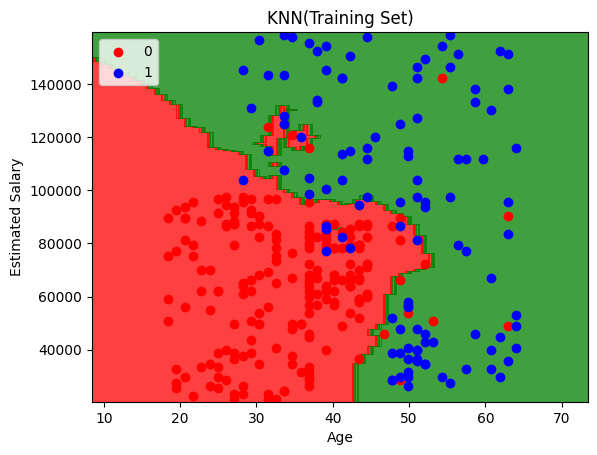

In [18]:
from matplotlib.colors import ListedColormap
X_set,Y_set=sc.inverse_transform(X_train),Y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-10,stop=X_set[:,0].max()+10,step=1),np.arange(start=X_set[:,1].min()-1000,stop=X_set[:,1].max()+1000,step=1))
plt.contourf(X1,X2,neig.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X2.shape),alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set==j,0],X_set[Y_set==j,1],color=ListedColormap(('red','blue'))(j),label=j)
plt.title('KNN(Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend(loc='upper left')
plt.show()

## Visualising the Test set results

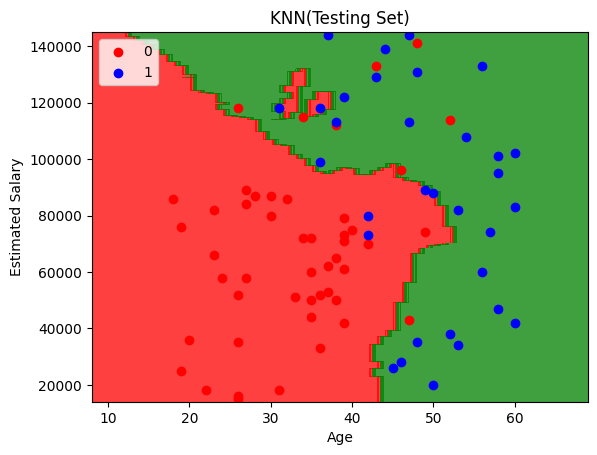

In [19]:
from matplotlib.colors import ListedColormap
X_set,Y_set=sc.inverse_transform(X_test),Y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-10,stop=X_set[:,0].max()+10,step=1),np.arange(start=X_set[:,1].min()-1000,stop=X_set[:,1].max()+1000,step=1))
plt.contourf(X1,X2,neig.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X2.shape),alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set==j,0],X_set[Y_set==j,1],color=ListedColormap(('red','blue'))(j),label=j)
plt.title('KNN(Testing Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend(loc='upper left')
plt.show()